In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
wine.data.shape

(178, 13)

In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(wine.data,wine.target,test_size = 0.3)

In [5]:
clf = DecisionTreeClassifier(random_state=0)
rfc  = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,ytrain)
rfc = rfc.fit(Xtrain,ytrain)

score_c = clf.score(Xtest,ytest)
score_r = rfc.score(Xtest,ytest)

In [6]:
print('tree:{}'.format(score_c),'RF:{}'.format(score_r))

tree:0.9444444444444444 RF:0.9814814814814815


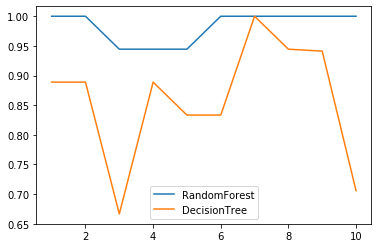

In [7]:
#交叉验证：
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)

rfc_s = cross_val_score(rfc,wine.data,wine.target,cv = 10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv = 10)

plt.plot(range(1,11),rfc_s,label = 'RandomForest')
plt.plot(range(1,11),clf_s,label = 'DecisionTree')
plt.legend()
plt.show()

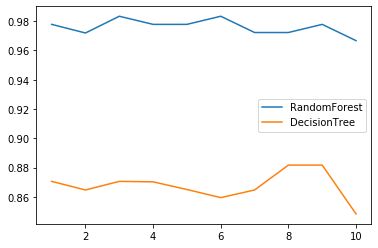

In [8]:
#随机森林和决策树的性能差距
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv =10).mean()
    rfc_l.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv = 10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = 'RandomForest')
plt.plot(range(1,11),clf_l,label = 'DecisionTree')
plt.legend()
plt.show()

0.9888888888888889 22


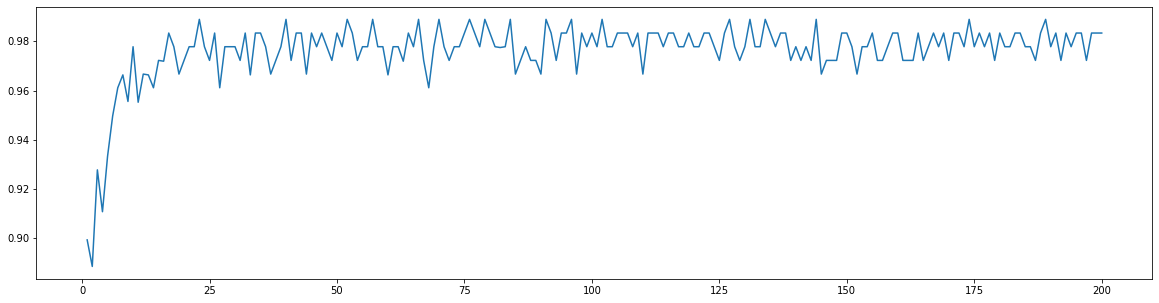

In [9]:
#n_estimators的学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs = -1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv = 10).mean()
    superpa.append(rfc_s)
    
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [10]:
#随机森林的重要属性之一：estimators_,查看森林中树的情况

In [11]:
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
rfc.score(Xtest,ytest)

0.9814814814814815

In [13]:
[*zip(rfc.feature_importances_,wine.feature_names)]

[(0.1085764288592, 'alcohol'),
 (0.03948395678996668, 'malic_acid'),
 (0.01941730060486464, 'ash'),
 (0.01388572643340181, 'alcalinity_of_ash'),
 (0.01151542470856806, 'magnesium'),
 (0.0447318644583379, 'total_phenols'),
 (0.08343182681295437, 'flavanoids'),
 (0.004434874166383718, 'nonflavanoid_phenols'),
 (0.013557639575639192, 'proanthocyanins'),
 (0.16176380564265583, 'color_intensity'),
 (0.07441807295885114, 'hue'),
 (0.2117653815688751, 'od280/od315_of_diluted_wines'),
 (0.21301769742030158, 'proline')]

In [14]:
rfc.predict(Xtest)

array([0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 2])